In [27]:
# -*- encoding: utf-8 -*-

"""
    Usa a ideia de ter mais de um classificador, que nesse caso são 
    usadas várias florestas aleatórias
"""

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ConfusionMatrix

In [28]:
#Lendo os dados de entrada e separando os previsores das classes
credito = pd.read_csv('dados/Credit.csv')
previsores = credito.iloc[:,0:20].values
classe = credito.iloc[:,20].values

In [29]:
#Apesar da árvore aleatória trabalhar com dados categóricos é melhor 
#arrumar os dados para numéricos com LabelEncoder

In [30]:
labelEncoder = LabelEncoder()
previsores[:,0] = labelEncoder.fit_transform(previsores[:,0])
previsores[:,2] = labelEncoder.fit_transform(previsores[:,2])
previsores[:,3] = labelEncoder.fit_transform(previsores[:,3])
previsores[:,5] = labelEncoder.fit_transform(previsores[:,5])
previsores[:,6] = labelEncoder.fit_transform(previsores[:,6])
previsores[:,8] = labelEncoder.fit_transform(previsores[:,8])
previsores[:,9] = labelEncoder.fit_transform(previsores[:,9])
previsores[:,11] = labelEncoder.fit_transform(previsores[:,11])
previsores[:,13] = labelEncoder.fit_transform(previsores[:,13])
previsores[:,14] = labelEncoder.fit_transform(previsores[:,14])
previsores[:,16] = labelEncoder.fit_transform(previsores[:,16])
previsores[:,18] = labelEncoder.fit_transform(previsores[:,18])
previsores[:,19] = labelEncoder.fit_transform(previsores[:,19])

In [31]:
#Ajustando o dados de treinamento e validação/teste (random_state = 0 garante o mesmo resultado da base ao rodar)
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(previsores, classe, test_size = 0.3, random_state = 0)

In [32]:
#Gerando o modelo da árvore de decisão
floresta = RandomForestClassifier(n_estimators = 100)
floresta.fit(x_treinamento, y_treinamento)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
#Fazendo as previsões (respostas finais)
previsoes = floresta.predict(x_teste)
confusao = confusion_matrix(y_teste, previsoes)
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_erro = 1 - taxa_acerto

/Users/victor/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


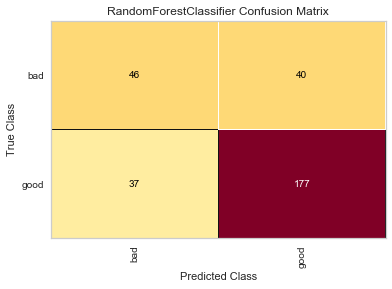

In [34]:
#Visualizando melhor os resultados com yellowbricks
v = ConfusionMatrix(RandomForestClassifier())
v.fit(x_treinamento, y_treinamento)
v.score(x_teste, y_teste)
v.poof()

In [35]:
taxa_acerto

0.8033333333333333

In [36]:
taxa_erro

0.19666666666666666

In [37]:
#Visualizando as árvores geradas
floresta.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=429703212, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=847929165, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                   

In [38]:
floresta.estimators_[0]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=429703212, splitter='best')